In [70]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import librosa
import random
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import models
from IPython import display

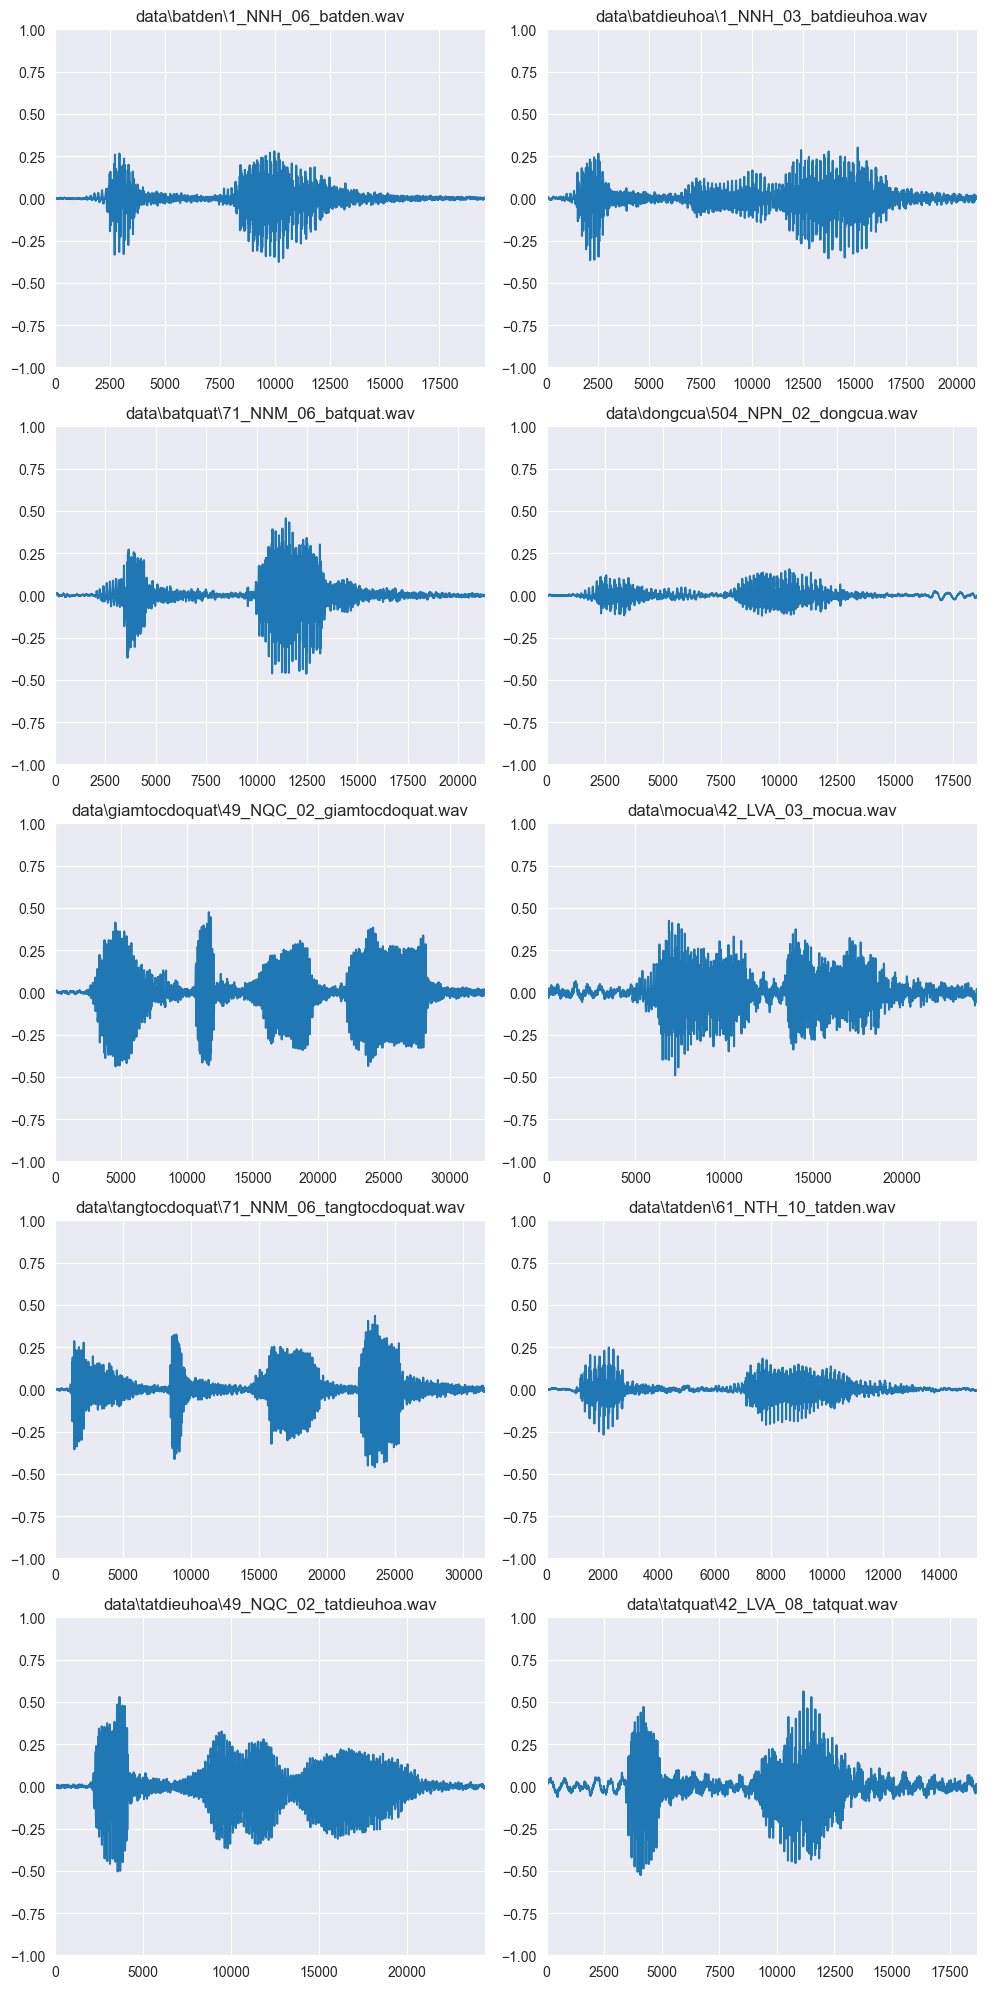

In [71]:
data_dir = 'data'
subdirs = os.listdir(data_dir)

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

for i, subdir in enumerate(subdirs):
    subdir_path = os.path.join(data_dir, subdir)
    if not os.path.isdir(subdir_path):
        continue
    wav_files = [f for f in os.listdir(subdir_path) if f.endswith('.wav')]
    if len(wav_files) == 0:
        continue
    wav_file_path = os.path.join(subdir_path, random.choice(wav_files))
    y, sr = librosa.load(wav_file_path)
    axs[i//2, i%2].set_title(wav_file_path)
    axs[i//2, i%2].plot(y)
    axs[i//2, i%2].set_xlim([0, len(y)])
    axs[i//2, i%2].set_ylim([-1, 1])

plt.tight_layout()
plt.show()

In [72]:
# data_dir = 'data'
# pic_dir = 'data_picture'
#
# # Tạo thư mục mới để chứa hình ảnh spectrogram
# if not os.path.exists(pic_dir):
#     os.makedirs(pic_dir)
#
# # Lặp qua tất cả các thư mục con trong thư mục gốc
# for subdir in os.listdir(data_dir):
#     subdir_path = os.path.join(data_dir, subdir)
#     if not os.path.isdir(subdir_path):
#         continue
#
#     # Tạo các thư mục con tương ứng trong thư mục ảnh
#     pic_subdir_path = os.path.join(pic_dir, subdir)
#     if not os.path.exists(pic_subdir_path):
#         os.makedirs(pic_subdir_path)
#
#     # Lặp qua tất cả các tệp âm thanh trong thư mục con
#     for filename in os.listdir(subdir_path):
#         if not filename.endswith('.wav'):
#             continue
#
#         # Đọc tệp âm thanh
#         audio_path = os.path.join(subdir_path, filename)
#         audio, sr = librosa.load(audio_path)
#
#         # Trích xuất đặc trưng Mel Spectrogram
#         spec = librosa.feature.melspectrogram(y=audio, sr=sr)
#         spec_db = librosa.power_to_db(spec, ref=np.max)
#
#         # Tạo tên file ảnh spectrogram và lưu vào thư mục ảnh tương ứng
#         pic_filename = os.path.splitext(filename)[0] + '.png'
#         pic_path = os.path.join(pic_subdir_path, pic_filename)
#
#         # Vẽ đồ thị và lưu hình ảnh
#         plt.figure(figsize=(10,4))
#         librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='mel', cmap='jet')
#         plt.axis('off')
#         plt.tight_layout()
#         plt.savefig(pic_path, bbox_inches='tight', pad_inches=0)
#         plt.close()

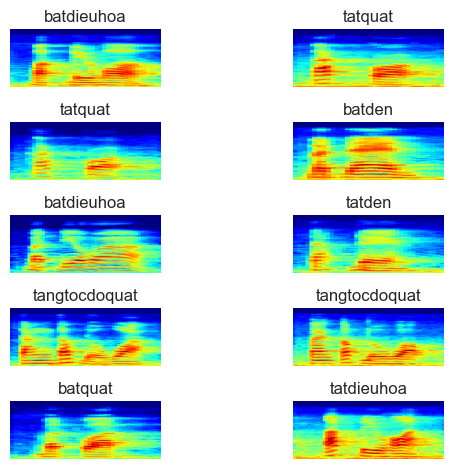

In [73]:
data_dir = 'data_picture'
subdirs = os.listdir(data_dir)

fig, axs = plt.subplots(nrows=5, ncols=2)

for i in range(5):
    for j in range(2):
        subdir = random.choice(subdirs)
        subdir_path = os.path.join(data_dir, subdir)
        if not os.path.isdir(subdir_path):
            continue
        image_files = [f for f in os.listdir(subdir_path) if f.endswith('.png')]
        if len(image_files) == 0:
            continue
        image_file_path = os.path.join(subdir_path, random.choice(image_files))
        image = plt.imread(image_file_path)
        axs[i,j].imshow(image)
        axs[i,j].axis('off')
        axs[i,j].set_title(subdir)

plt.tight_layout()
plt.show()

In [2]:
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.utils import to_categorical
from IPython import display
import matplotlib.pyplot as plt

In [3]:
data_dir = 'data_picture'
class_names = os.listdir(data_dir)
class_names.sort()
class_to_index = dict(zip(class_names, range(len(class_names))))
images = []
labels = []
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith('.png'):
            filepath = os.path.join(class_dir, filename)
            image = plt.imread(filepath)
            images.append(image)
            labels.append(class_name)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [76]:
# Tiền xử lý dữ liệu hình ảnh để chuẩn hóa kích thước và định dạng hình ảnh
IMG_SIZE = 128

def preprocess_image(image):
    # Kiểm tra xem ảnh có 4 kênh màu hay không
    if image.shape[2] == 4:
        # Nếu có, chuyển đổi sang RGB bằng cách bỏ qua kênh alpha
        image = image[:,:,:3]
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image

X_train = np.array([preprocess_image(image) for image in X_train])
X_val = np.array([preprocess_image(image) for image in X_val])
X_test = np.array([preprocess_image(image) for image in X_test])

# Chuyển đổi nhãn sang định dạng one-hot
y_train = to_categorical(y_train, len(class_names))
y_val = to_categorical(y_val, len(class_names))
y_test = to_categorical(y_test, len(class_names))


In [5]:
print(class_names)

['batden', 'batdieuhoa', 'batquat', 'dongcua', 'giamtocdoquat', 'mocua', 'tangtocdoquat', 'tatden', 'tatdieuhoa', 'tatquat']


In [77]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
    ])

model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
26/26 [==============================] - 4s 117ms/step - loss: 2.2034 - accuracy: 0.1815 - val_loss: 1.6469 - val_accuracy: 0.4667
Epoch 2/10
26/26 [==============================] - 3s 112ms/step - loss: 1.1185 - accuracy: 0.5889 - val_loss: 0.8178 - val_accuracy: 0.6444
Epoch 3/10
26/26 [==============================] - 3s 113ms/step - loss: 0.6024 - accuracy: 0.7889 - val_loss: 0.3063 - val_accuracy: 0.9111
Epoch 4/10
26/26 [==============================] - 3s 114ms/step - loss: 0.3090 - accuracy: 0.8975 - val_loss: 0.1943 - val_accuracy: 0.9556
Epoch 5/10
26/26 [==============================] - 3s 114ms/step - loss: 0.2083 - accuracy: 0.9370 - val_loss: 0.1012 - val_accuracy: 0.9778
Epoch 6/10
26/26 [==============================] - 3s 112ms/step - loss: 0.1718 - accuracy: 0.9457 - val_loss: 0.0583 - val_accuracy: 0.9889
Epoch 7/10
26/26 [==============================] - 3s 111ms/step - loss: 0.0801 - accuracy: 0.9802 - val_loss: 0.0950 - val_accuracy: 0.9667
Epoch 

In [78]:
test_loss, test_acc = model.evaluate(X_test, tf.keras.utils.to_categorical(y_test), verbose=2)

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/cond/remove_squeezable_dimensions/cond/Squeeze' defined at (most recent call last):
    File "C:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel\kernelapp.py", line 728, in start
      self.io_loop.start()
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\LAPTOP\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel\kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel\kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel\kernelbase.py", line 409, in dispatch_shell
      await result
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel\ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_23356\1587913799.py", line 1, in <module>
      test_loss, test_acc = model.evaluate(X_test, tf.keras.utils.to_categorical(y_test), verbose=2)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\engine\training.py", line 2040, in evaluate
      tmp_logs = self.test_function(iterator)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\engine\training.py", line 1820, in test_function
      return step_function(self, iterator)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\engine\training.py", line 1804, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\engine\training.py", line 1792, in run_step
      outputs = model.test_step(data)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\engine\training.py", line 1758, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
      return self.compiled_loss(
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\losses.py", line 277, in call
      y_pred, y_true = losses_utils.squeeze_or_expand_dimensions(
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\utils\losses_utils.py", line 209, in squeeze_or_expand_dimensions
      y_true, y_pred = tf.cond(
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\utils\losses_utils.py", line 204, in <lambda>
      squeeze_dims = lambda: remove_squeezable_dimensions(y_true, y_pred)
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\utils\losses_utils.py", line 155, in remove_squeezable_dimensions
      labels = tf.cond(
    File "D:\Learn_Py\DataSci\venv\lib\site-packages\keras\utils\losses_utils.py", line 157, in <lambda>
      lambda: tf.squeeze(labels, [-1]),
Node: 'categorical_crossentropy/cond/remove_squeezable_dimensions/cond/Squeeze'
Can not squeeze dim[2], expected a dimension of 1, got 2
	 [[{{node categorical_crossentropy/cond/remove_squeezable_dimensions/cond/Squeeze}}, {{node cond/remove_squeezable_dimensions/cond/Squeeze}}]] [Op:__inference_test_function_27076]

In [79]:
print("Test accuracy:", test_acc)

NameError: name 'test_acc' is not defined